<a href="https://colab.research.google.com/github/Dinesh-Adhithya-H/Bioinformatics/blob/master/Dropping_columns.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Dropping properties based on correlation between properties , if correlation is above 0.8 or less than -0.8 one of two properties is dropped.

We get 38 properties instaed of 90.

In [1]:
!wget https://raw.githubusercontent.com/Dinesh-Adhithya-H/Bioinformatics/master/corrMatrix.txt

--2021-02-12 10:19:02--  https://raw.githubusercontent.com/Dinesh-Adhithya-H/Bioinformatics/master/corrMatrix.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 162371 (159K) [text/plain]
Saving to: ‘corrMatrix.txt’

corrMatrix.txt      100%[===================>] 158.57K  --.-KB/s    in 0.01s   

2021-02-12 10:19:02 (11.3 MB/s) - ‘corrMatrix.txt’ saved [162371/162371]



In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
data=pd.read_csv("/content/corrMatrix.txt")

In [4]:
data

,Physicochemical properties,Base stacking,Protein induced deformability,B-DNA twist,Dinucleotide GC Content,A-philicity,Propeller twist,Duplex stability-free energy,Duplex stability-disrupt energy,DNA denaturation,Bending stiffness,Protein DNA twist,Stabilising energy of Z-DNA,Aida_BA_transition,Breslauer_dG,Breslauer_dH,Breslauer_dS,Electron_interaction,Hartman_trans_free_energy,Helix-Coil_transition,Ivanov_BA_transition,Lisser_BZ_transition,Polar_interaction,SantaLucia_dG,SantaLucia_dH,SantaLucia_dS,Sarai_flexibility,Stability,Stacking_energy,Sugimoto_dG,Sugimoto_dH,Sugimoto_dS,Watson-Crick_interaction,Twist,Tilt,Roll,Shift,Slide,Rise,Stacking energy,...,Persistance Length,Melting Temperature,Mobility to bend towards major groove,Mobility to bend towards minor groove,Propeller Twist,Clash Strength,Enthalpy,Free energy,Twist_twist,Tilt_tilt,Roll_roll,Twist_tilt,Twist_roll,Tilt_roll,Shift_shift,Slide_slide,Rise_rise,Shift_slide,Shift_rise,Slide_rise,Twist_shift,Twist_slide,Twist_rise,Tilt_shift,Tilt_slide,Tilt_rise,Roll_shift,Roll_slide,Roll_rise,Slide stiffness,Shift stiffness,Roll stiffness,Rise stiffness,Tilt stiffness,Twist stiffness,Wedge,Direction,Flexibility_slide,Flexibility_shift,Entropy
0,Base stacking,1.000000,0.048011,-0.176205,-0.673909,0.250612,-0.292577,0.564560,-0.348297,-0.890502,-0.466531,0.229268,-0.163855,-0.587383,-0.400469,-0.231340,-0.125923,-0.673909,0.826218,-0.400498,0.250612,0.826941,-0.673909,-0.807859,-0.684442,-0.518598,-0.025341,-0.862414,-0.999961,-0.592603,-0.639163,-0.608587,-0.673909,-0.236589,-0.359639,-0.672635,-0.025688,-0.325664,-0.652698,0.276796,...,-0.466531,-0.965248,0.590250,-0.390308,-0.328103,0.124369,0.639163,0.739291,-0.162415,-0.428373,-0.441718,0.075421,-0.024967,0.046985,0.220218,-0.060256,-0.541841,-0.158897,-0.083354,-0.584990,0.098846,0.319970,0.382531,0.564422,0.428769,-0.159612,-0.217383,-0.409806,-0.678366,-0.325664,-0.025688,-0.672635,-0.652698,-0.359639,-0.236589,0.110393,-0.284241,0.176516,-0.117430,0.488914
1,Protein induced deformability,0.048011,1.000000,-0.034336,0.416526,0.294265,0.668622,-0.576001,0.575073,-0.223709,0.325758,0.682941,-0.918670,0.456142,0.500489,0.115542,-0.084724,0.416526,0.494059,0.498821,0.294265,0.491189,0.416526,0.399959,0.179097,0.041148,-0.263483,-0.274610,-0.042317,0.590401,0.458913,0.381356,0.416526,-0.893037,-0.640100,-0.672788,-0.485858,-0.555528,-0.645935,-0.239906,...,0.325758,-0.159089,-0.340846,0.633492,0.374724,0.022090,-0.458913,-0.434621,-0.866884,-0.744924,-0.765842,-0.146828,-0.673509,0.011592,-0.011656,-0.678446,-0.659368,-0.448163,-0.220588,-0.535872,0.048199,0.674575,0.369727,-0.244262,0.433157,0.032892,-0.120889,0.435658,-0.544198,-0.555528,-0.485858,-0.672788,-0.645935,-0.640100,-0.893037,-0.113986,-0.034564,-0.749390,0.094178,-0.547666
2,B-DNA twist,-0.176205,-0.034336,1.000000,-0.136978,0.516900,-0.037622,0.166012,-0.160504,-0.068954,-0.121908,0.037634,0.280257,0.287889,-0.000726,-0.133944,-0.175955,-0.136978,-0.250995,-0.000529,0.516900,-0.250534,-0.136978,0.003733,0.082707,0.108426,0.420651,0.179995,0.174557,-0.172490,-0.088578,-0.047886,-0.136978,-0.033127,0.151913,0.320509,-0.125847,0.343143,0.474306,0.092301,...,-0.121908,0.183853,0.168150,-0.062421,-0.290000,-0.465502,0.088578,0.200904,-0.027228,0.230098,0.237993,0.202734,0.323376,0.189898,-0.151426,0.204175,0.541362,0.076025,0.113771,0.107977,0.055891,0.078290,0.282826,0.139167,-0.489840,-0.346738,0.353423,0.091696,0.082483,0.343143,-0.125847,0.320509,0.474306,0.151913,-0.033127,-0.185902,0.091730,0.115809,-0.770035,0.109991
3,Dinucleotide GC Content,-0.673909,0.416526,-0.136978,1.000000,-0.413914,0.762917,-0.941863,0.776537,0.706987,0.915315,-0.063827,-0.445864,0.440365,0.776537,0.497940,0.314281,1.000000,-0.431993,0.777782,-0.413914,-0.434287,1.000000,0.922953,0.319582,0.014600,-0.370542,0.474238,0.676860,0.924033,0.813383,0.714258,1.000000,-0.144366,0.210920,0.066626,0.002738,-0.228430,0.102358,0.043807,...,0.915315,0.654814,-0.845908,0.873401,0.364755,0.32980

In [5]:
d1=data.drop(["Physicochemical properties"],axis=1)

In [6]:
d1

,Base stacking,Protein induced deformability,B-DNA twist,Dinucleotide GC Content,A-philicity,Propeller twist,Duplex stability-free energy,Duplex stability-disrupt energy,DNA denaturation,Bending stiffness,Protein DNA twist,Stabilising energy of Z-DNA,Aida_BA_transition,Breslauer_dG,Breslauer_dH,Breslauer_dS,Electron_interaction,Hartman_trans_free_energy,Helix-Coil_transition,Ivanov_BA_transition,Lisser_BZ_transition,Polar_interaction,SantaLucia_dG,SantaLucia_dH,SantaLucia_dS,Sarai_flexibility,Stability,Stacking_energy,Sugimoto_dG,Sugimoto_dH,Sugimoto_dS,Watson-Crick_interaction,Twist,Tilt,Roll,Shift,Slide,Rise,Stacking energy,Bend,...,Persistance Length,Melting Temperature,Mobility to bend towards major groove,Mobility to bend towards minor groove,Propeller Twist,Clash Strength,Enthalpy,Free energy,Twist_twist,Tilt_tilt,Roll_roll,Twist_tilt,Twist_roll,Tilt_roll,Shift_shift,Slide_slide,Rise_rise,Shift_slide,Shift_rise,Slide_rise,Twist_shift,Twist_slide,Twist_rise,Tilt_shift,Tilt_slide,Tilt_rise,Roll_shift,Roll_slide,Roll_rise,Slide stiffness,Shift stiffness,Roll stiffness,Rise stiffness,Tilt stiffness,Twist stiffness,Wedge,Direction,Flexibility_slide,Flexibility_shift,Entropy
0,1.000000,0.048011,-0.176205,-0.673909,0.250612,-0.292577,0.564560,-0.348297,-0.890502,-0.466531,0.229268,-0.163855,-0.587383,-0.400469,-0.231340,-0.125923,-0.673909,0.826218,-0.400498,0.250612,0.826941,-0.673909,-0.807859,-0.684442,-0.518598,-0.025341,-0.862414,-0.999961,-0.592603,-0.639163,-0.608587,-0.673909,-0.236589,-0.359639,-0.672635,-0.025688,-0.325664,-0.652698,0.276796,0.407635,...,-0.466531,-0.965248,0.590250,-0.390308,-0.328103,0.124369,0.639163,0.739291,-0.162415,-0.428373,-0.441718,0.075421,-0.024967,0.046985,0.220218,-0.060256,-0.541841,-0.158897,-0.083354,-0.584990,0.098846,0.319970,0.382531,0.564422,0.428769,-0.159612,-0.217383,-0.409806,-0.678366,-0.325664,-0.025688,-0.672635,-0.652698,-0.359639,-0.236589,0.110393,-0.284241,0.176516,-0.117430,0.488914
1,0.048011,1.000000,-0.034336,0.416526,0.294265,0.668622,-0.576001,0.575073,-0.223709,0.325758,0.682941,-0.918670,0.456142,0.500489,0.115542,-0.084724,0.416526,0.494059,0.498821,0.294265,0.491189,0.416526,0.399959,0.179097,0.041148,-0.263483,-0.274610,-0.042317,0.590401,0.458913,0.381356,0.416526,-0.893037,-0.640100,-0.672788,-0.485858,-0.555528,-0.645935,-0.239906,0.246283,...,0.325758,-0.159089,-0.340846,0.633492,0.374724,0.022090,-0.458913,-0.434621,-0.866884,-0.744924,-0.765842,-0.146828,-0.673509,0.011592,-0.011656,-0.678446,-0.659368,-0.448163,-0.220588,-0.535872,0.048199,0.674575,0.369727,-0.244262,0.433157,0.032892,-0.120889,0.435658,-0.544198,-0.555528,-0.485858,-0.672788,-0.645935,-0.640100,-0.893037,-0.113986,-0.034564,-0.749390,0.094178,-0.547666
2,-0.176205,-0.034336,1.000000,-0.136978,0.516900,-0.037622,0.166012,-0.160504,-0.068954,-0.121908,0.037634,0.280257,0.287889,-0.000726,-0.133944,-0.175955,-0.136978,-0.250995,-0.000529,0.516900,-0.250534,-0.136978,0.003733,0.082707,0.108426,0.420651,0.179995,0.174557,-0.172490,-0.088578,-0.047886,-0.136978,-0.033127,0.151913,0.320509,-0.125847,0.343143,0.474306,0.092301,-0.180224,...,-0.121908,0.183853,0.168150,-0.062421,-0.290000,-0.465502,0.088578,0.200904,-0.027228,0.230098,0.237993,0.202734,0.323376,0.189898,-0.151426,0.204175,0.541362,0.076025,0.113771,0.107977,0.055891,0.078290,0.282826,0.139167,-0.489840,-0.346738,0.353423,0.091696,0.082483,0.343143,-0.125847,0.320509,0.474306,0.151913,-0.033127,-0.185902,0.091730,0.115809,-0.770035,0.109991
3,-0.673909,0.416526,-0.136978,1.000000,-0.413914,0.762917,-0.941863,0.776537,0.706987,0.915315,-0.063827,-0.445864,0.440365,0.776537,0.497940,0.314281,1.000000,-0.431993,0.777782,-0.413914,-0.434287,1.000000,0.922953,0.319582,0.014600,-0.370542,0.474238,0.676860,0.924033,0.813383,0.714258,1.000000,-0.144366,0.210920,0.066626,0.002738,-0.228430,0.102358,0.043807,-0.445321,...,0.915315,0.654814,-0.845908,0.873401,0.364755,0.329803,-0.813383,-0.971876,-0.119555,0.114151,0.042927,-0.364662,-0.6

In [15]:
d1=data.drop(["Physicochemical properties"],axis=1)
columns=d1.columns
n=0
i=0
while n<90:
  try:
    col=np.array(d1[columns[i]])
    for j in range(len(col)):
      if (col[j]>0.7 and col[j]<0.99) or (col[j]<-0.7 and col[j]>-0.99):
        try:
          d1=d1.drop(j,axis=0)
          d1=d1.drop(columns[j],axis=1)
          columns=d1.columns
        except IndexError:
          pass
        except KeyError:
          pass                                 
    if i>=len(d1.iloc[0]):
      i=0
    n=n+1
    i+=1
  except IndexError:
    n=n+1
    i+=1
    pass

In [20]:
d1

,Protein induced deformability,Duplex stability-free energy,Aida_BA_transition,Breslauer_dG,Breslauer_dH,Hartman_trans_free_energy,Ivanov_BA_transition,Lisser_BZ_transition,Polar_interaction,SantaLucia_dS,Watson-Crick_interaction,Roll,Shift,Rise,Stacking energy,Bend,Tip,Inclination,Major Groove Size,Minor Groove Width,Minor Groove Size,Persistance Length,Propeller Twist,Clash Strength,Free energy,Twist_twist,Slide_slide,Shift_slide,Twist_slide,Twist_rise,Tilt_slide,Roll_shift,Slide stiffness,Shift stiffness,Wedge
18,4.988214e-01,-9.073206e-01,0.483613,9.999436e-01,8.528348e-01,-1.922209e-01,-1.463627e-01,-1.951813e-01,0.777782,0.190492,0.777782,-4.522933e-02,1.265737e-01,-2.161177e-02,-1.346530e-02,-4.006575e-01,-3.654184e-01,-3.708071e-18,1.259788e-01,-6.040054e-01,0.648597,7.734891e-01,-0.037319,0.343470,-7.550954e-01,-0.176218,9.532968e-03,2.101322e-01,-0.080530,3.081087e-02,0.217776,-5.673432e-02,-2.016063e-01,1.265737e-01,1.402473e-01
33,-6.400995e-01,-9.509241e-02,-0.237868,1.645172e-01,3.093057e-01,-7.387746e-01,-4.080543e-01,-7.378633e-01,0.210920,-0.090536,0.210920,5.969212e-01,7.930488e-01,7.149285e-01,4.403827e-01,-8.006242e-01,-1.243525e-01,1.483529e-17,7.943753e-02,-3.101561e-01,-0.016051,3.907920e-01,-0.373920,0.191342,-1.051930e-01,0.814727,7.919173e-01,4.267556e-01,-0.866557,-3.862097e-01,-0.240880,2.457332e-01,3.590859e-01,7.930488e-01,1.520948e-01
41,1.484113e-17,-2.965703e-17,0.000000,-1.855421e-18,-1.481747e-17,7.403861e-18,1.484572e-17,7.411893e-18,0.000000,0.000000,0.000000,3.707247e-18,-5.931239e-17,-1.113668e-17,-1.482833e-17,1.853330e-18,2.229662e-17,1.000000e+00,0.000000e+00,-2.598903e-17,0.000000,1.481243e-17,0.000000,0.000000,-2.965382e-17,0.000000,3.710369e-17,-1.483965e-17,0.000000,-4.451793e-17,0.000000,-1.483584e-17,9.278594e-18,-5.931239e-17,2.965377e-17
50,3.257582e-01,-8.581875e-01,0.160987,7.723883e-01,5.544852e-01,-3.868951e-01,-4.673034e-01,-3.886723e-01,0.915315,-0.201930,0.915315,3.028727e-03,2.083839e-01,1.106871e-01,3.588783e-01,-4.994412e-01,-3.862679e-01,1.481243e-17,5.540995e-18,-5.675146e-01,0.617136,1.000000e+00,0.219221,0.348193,-8.151860e-01,0.071228,2.025960e-01,7.373424e-02,-0.277830,1.513419e-02,0.298902,-2.489766e-01,-3.163833e-01,2.083839e-01,-1.398541e-01
54,3.747239e-01,-2.901127e-01,0.350297,-3.359125e-02,-2.650128e-01,-1.106476e-01,-3.194073e-01,-1.132036e-01,0.364755,0.138633,0.364755,5.430548e-03,-4.500210e-01,-1.103003e-01,-2.492415e-01,2.740190e-01,-1.343219e-01,0.000000e+00,-9.483629e-02,3.169661e-01,0.200712,2.192207e-01,1.000000,-0.057038,-4.592569e-01,-0.348495,-2.785448e-01,-5.911608e-01,0.394580,-1.245023e-01,-0.135219,-8.930200e-02,-9.756873e-03,-4.500210e-01,-5.939546e-01
55,2.208967e-02,-3.537462e-01,0.073248,3.427012e-01,4.766368e-01,-5.885289e-03,-6.236831e-01,-8.830861e-03,0.329803,-0.408976,0.329803,-2.273281e-01,1.885884e-01,-2.570885e-01,2.267726e-01,-4.891961e-01,-3.624175e-01,0.000000e+00,9.055904e-01,-1.041921e-01,0.839463,3.481931e-01,-0.057038,1.000000,-2.946591e-01,0.037023,1.993576e-01,-2.799475e-01,0.023790,9.228860e-02,0.555651,-3.815799e-01,8.051453e-02,1.885884e-01,3.009240e-01
58,-8.668843e-01,2.678955e-01,-0.448913,-1.786589e-01,1.746184e-01,-6.156011e-01,-5.122242e-01,-6.125587e-01,-0.119555,-0.101139,-0.119555,6.287109e-01,5.731577e-01,7.165338e-01,5.158551e-01,-3.527026e-01,4.341831e-01,0.000000e+00,-4.654448e-02,1.999086e-01,-0.348204,7.122775e-02,-0.348495,0.037023,1.888525e-01,1.000000,8.373015e-01,5.644142e-01,-0.896828,-2.691849e-01,-0.304282,1.710933e-01,3.980082e-01,5.731577e-01,-6.956454e-02
59,-7.449235e-01,2.193634e-02,-0.173774,5.308123e-02,2.501071e-01,-8.271046e-01,-4.094425e-01,-8.257690e-01,0.114151,0.032712,0.114151,7.605097e-01,6.832799e-01,8.567808e-01,3.882142e-01,-6.835405e-01,3.980825e-02,7.418734e-18,-1.552455e-02,-1.564624e-01,-0.189837,2.610125e-01,-0.315816,0.054645,-3.930656e-02,0.881181,8.397217e-01,4.664467e-01,-0.867450,-3.933659e-01,-0.440061,3.225510e-01,5.194800e-01,6.832799e-01,1.664004e-02
60,-7.658416

In [17]:
len(d1.columns)

35

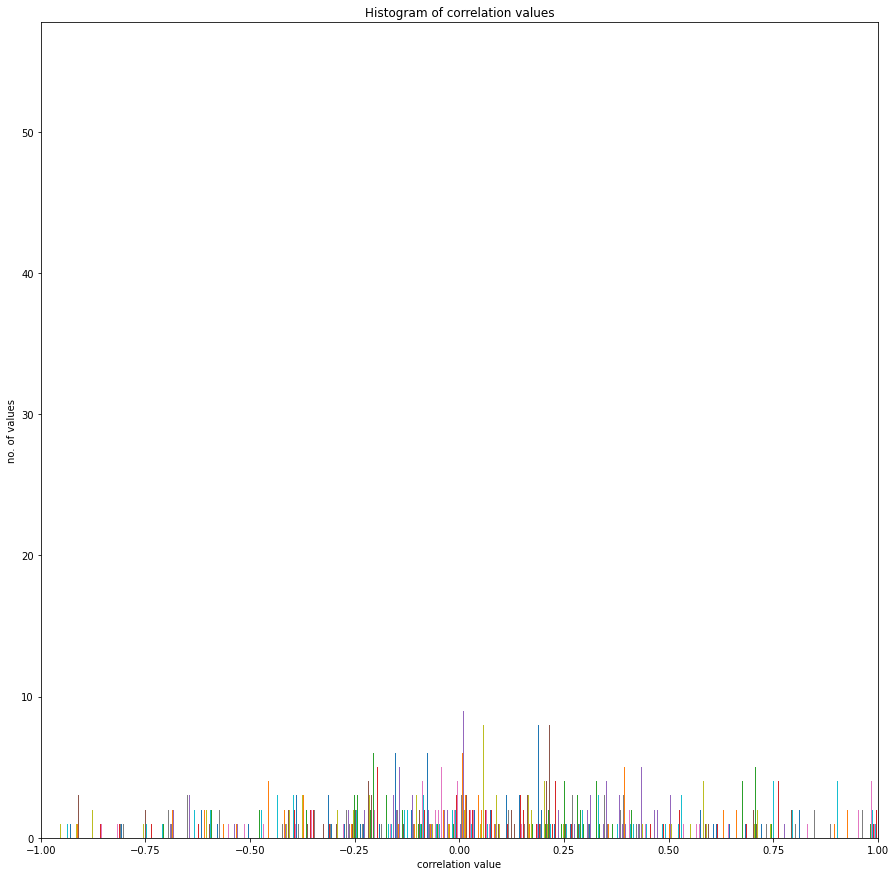

In [41]:
corr=np.array(data.drop(["Physicochemical properties"],axis=1))
plt.figure(figsize=(15,15))
plt.hist(corr,bins=100)
plt.xlim(-1,1)
plt.xlabel("correlation value")
plt.ylabel("no. of values")
plt.title("Histogram of correlation values")
plt.show()

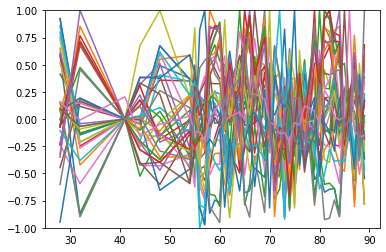

In [12]:
plt.plot(d1)
plt.ylim(-1,1)
plt.show()